In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import kaepora as kpora
import kaepora_plot as kplot
import matplotlib.pyplot as plt
import copy
import numpy as np

In [3]:
example_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8))"]


In [6]:
spec_array = kpora.grab(example_query[0], verbose=True, db_file = '../data/kaepora_v1.2.db')
copy_array = copy.deepcopy(spec_array)

170 Total Spectra found
170 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1994s sn1994s-19940616-uoi.flm bsnip 56.524322367 0.998840596273 49519.338 0.015177 11.0 3126.0 11080.0
1998dk sn1998dk-19980831-ui.flm bsnip 225.833313606 -0.728371655089 51056.305 0.013219 14.0 3310.0 10016.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 173.128497131 0.496750833938 51142.252 0.010567 8.0 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 87.383415757 0.460351148368 51232.237 0.014443 14.0 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip 184.483349779 -0.385339276873 51249.466 0.0095 15.0 3298.0 10350.0
2000cx sn2000cx-20000728-ui.flm bsnip 230.381439474 0.496974506501 51753.396 0.0081 None 3328.0 10316.0
2000dn sn2000dn-20001006-uri-corrected.flm bsnip 31.1030531774 -0.845876955424 51823.327 0.032065 8.0 3250.0 10026.0
2001cp sn2001cp-20010629-ui.flm bsnip 39.9997914207 0.9174473

2005ag SN05ag_050212_b01_DUP_WF.dat csp 5.6362422927 -0.861378297777 53413.39 0.079665 None 3574.0 8504.0
2005bo SN05bo_050418_b01_DUP_WF.dat csp 44.471272488 0.481311692701 53478.23 0.013896 11.0 3800.0 9058.0
2005hc SN05hc_051024_b01_MGH_BC.dat csp 41.4406716962 -0.445532248699 53667.28 0.04594 None 3766.0 6968.0
2005kc SN05kc_051124_b01_DUP_MS.dat csp 39.3910886492 0.791039483088 53698.08 0.01512 11.0 3776.0 7130.0
2005ku SN05ku_051125_b01_DUP_MS.dat csp 27.8340291555 0.546182034425 53699.13 0.045439 None 3668.0 6922.0
2005m SN05M_050204_b01_DUP_WF.dat csp 42.3953559156 0.492172211312 53405.21 0.022 19.0 3772.0 8986.0
2006ax SN06ax_060402_b01_DUP_WF.dat csp 103.646574905 0.403249998404 53827.14 0.016739 13.0 3790.0 9032.0
2007af SN07af_070314_b01_DUP_BC.dat csp 157.252541826 -0.392853448941 54173.3 0.005464 15.0 3464.0 9542.0
2007af SN07af_070314_r01_DUP_BC.dat csp 109.9297304 -0.38290779177 54173.31 0.005464 15.0 4988.0 9542.0
2007ai SN07ai_070314_b01_DUP_BC.dat csp 31.315916639 -0

In [7]:
print spec_array[0].event_data.keys()

[u'e_mb_lc', u'salt2_phot_source', u'e_c_salt', u'logMst_lc', u'Foundation_vel', u'delta', u'cov_mb_s_lc', u'B_minus_V_cfa_err', u'NED_host', u'e_Bmag_salt', u'mu_mlcs31', u'glon_host', u'zCMB_mlcs31', u'Carbon_presence', u'e_av_mlcs31', u'e_logMst_lc', u'e_s_salt', u'av_mlcs17', u'RA', u'Dm15_from_fits', u'cov_s_c_lc', u'MJD_max', u'M_b_cfa_err', u'e_delta_mlcs17', u'cERR', u'Foundation_x1', u'e_c_lc', u'Av_25', u'Redshift', u'av_mlcs31', u't0', u'Bmag_salt2', u'czCMB_host', u'x1ERR', u'mtype_host', u'filt_host', u'x1_salt2', u'cz_host', u'mu_salt', u'Ebv_host', u'mb_lc', u'globalmass', u'MUMODEL', u'zCMB_mlcs17', u'DEC', u'Homogenized_Photometry', u'e_c_salt2', u'e_av_mlcs17', u'Foundation_z', u'MURES_NO_MSTEP_C', u'Foundation_c', u'delta_mlcs17', u'bias_lc', u'global_umg', u'localmass', u'e_delta_mlcs31', u'MURES_NO_MSTEP', u'e_zCMB_mlcs31', u'zCMB_salt2', u'separation', u'V_at_max', u'c', u'Bmag_salt', u't1_host', u'Foundation_mjd_max', u'MU', u'ypos_host', u'localssfr', u'glat_hos

In [8]:
spec_array_dered = kpora.host_dereddening(spec_array, verbose=False, cutoff=2.)

In [9]:
for spec in spec_array_dered:
    print spec.name, spec.filename, spec.source, spec.phase, spec.wavelength[spec.x1], spec.wavelength[spec.x2]

1994s sn1994s-19940616-uoi.flm bsnip 0.998840596273 3126.0 11080.0
1998dk sn1998dk-19980831-ui.flm bsnip -0.728371655089 3310.0 10016.0
1998es sn1998es-19981125-ui-corrected.flm bsnip 0.496750833938 3348.0 10042.0
1999aa sn1999aa-19990223-ui.flm bsnip 0.460351148368 3346.0 10348.0
1999ac sn1999ac-19990312-ui-corrected.flm bsnip -0.385339276873 3298.0 10350.0
2000cx sn2000cx-20000728-ui.flm bsnip 0.496974506501 3328.0 10316.0
2001cp sn2001cp-20010629-ui.flm bsnip 0.917447344588 3280.0 10122.0
2002de sn2002de-20020608.374-ui-corrected.flm bsnip -0.16048772706 3142.0 10064.0
2002ha sn2002ha-20021102-ui-corrected.flm bsnip -0.0433753943234 3110.0 10204.0
2002he sn2002he-20021108-br.flm bsnip 0.0575854705037 3050.0 9148.0
2005ag sn2005ag-20050212.596-br.flm bsnip -0.670578373849 3554.0 8516.0
2005eq sn2005eq-20051011.376-ui-corrected.flm bsnip 0.202142516304 3280.0 10154.0
2005lz sn2005lz-20060101.381-deimos.flm bsnip 0.451002115207 4774.0 9582.0
2005na sn2005na-20060105.335-ui.flm bsnip 0.

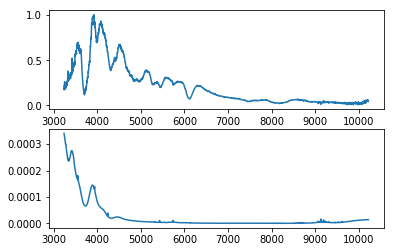

In [10]:
fig, ax = plt.subplots(2,1)
example_spec = spec_array_dered[20]
ax[0].plot(example_spec.wavelength, example_spec.flux)
ax[1].plot(example_spec.wavelength, 1/example_spec.ivar)
plt.show()

In [11]:
spec_attributes = dir(spec_array[0])
print len(spec_array)
for att in spec_attributes:
    print att

170
SNR
__class__
__delattr__
__dict__
__doc__
__format__
__getattribute__
__hash__
__init__
__module__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
av_25
av_mlcs17
av_mlcs31
c_array
dm15
dm15_array
event_data
filename
flux
hr_array
interp
ivar
low_conf
maxwave
minwave
mjd
morph_array
name
other_spectral_data
phase
phase_array
red_array
ref
shape_param
source
spec_bin
up_conf
vel
wavelength
x1
x2


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))
170 Total Spectra found
7 flagged spectra removed 163 spectra left
3 spectra of peculiar Ias removed 160 spectra left
143 spectra of SNe that have host reddening corrections
Arrays cleaned
143 spectra may have telluric contamination
96 total SNe
removed spectra of SNe with A_V > 2.0
Using 136 spectra of 92 SNe
Gini balancing...
Balanced after 27 iterations
Bootstrapping
scaling boots...
plotting...
[array([1.01733364]), array([1.00481349]), array([1.01388161]), array([1.00399416]), array([1.01738674]), array([1.00810679]), array([1.00750176]), array([1.01102215]), array([1.02127969]), array([1.00872148]), array([1.01323148]), array([1.0049169]), array([1.00435745]), array([1.00266861]), array([1.00061442]), array([1.00284878]), array([1.01826966]), array([1.00315454]), array([1.00779529]), array([1.01

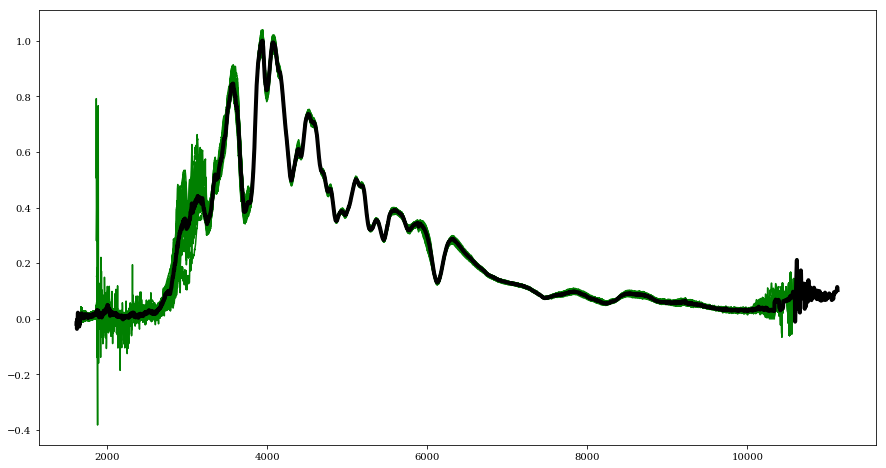

computing confidence intervals...


In [115]:
# ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
#               " phase >= -1 and phase <= 1 and ((dm15_source between 1.0 and 1.2) or (dm15_from_fits between 1.0 and 1.2))"]
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))"]
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '../data/kaepora_v1.2.db', shape_param='dm15', boot=True, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000])


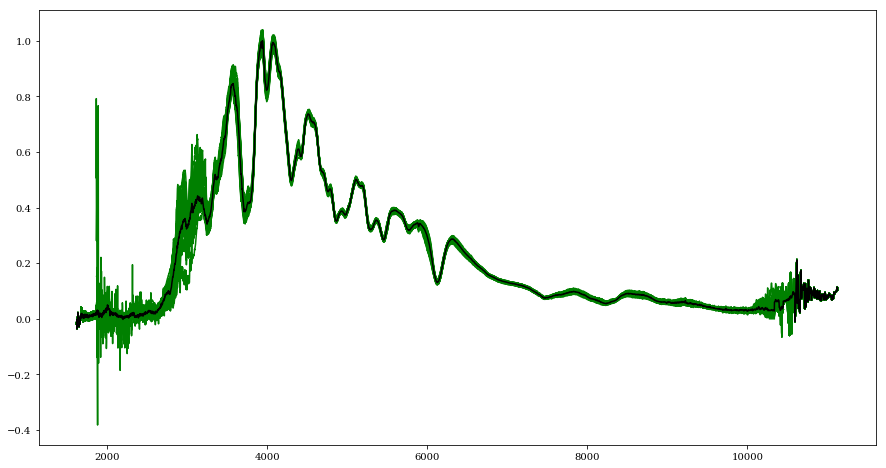

In [116]:
plt.figure(figsize = [15,8])
for b in boot_sn_arrays[0]:
    plt.plot(b.wavelength, b.flux, 'g')
plt.plot(composites[0].wavelength, composites[0].flux, 'k')
plt.show()

Phase:  0.06913949806140675
dm15:  1.1131386356738606
Redshift:  nan
HR:  1.5472957545444894


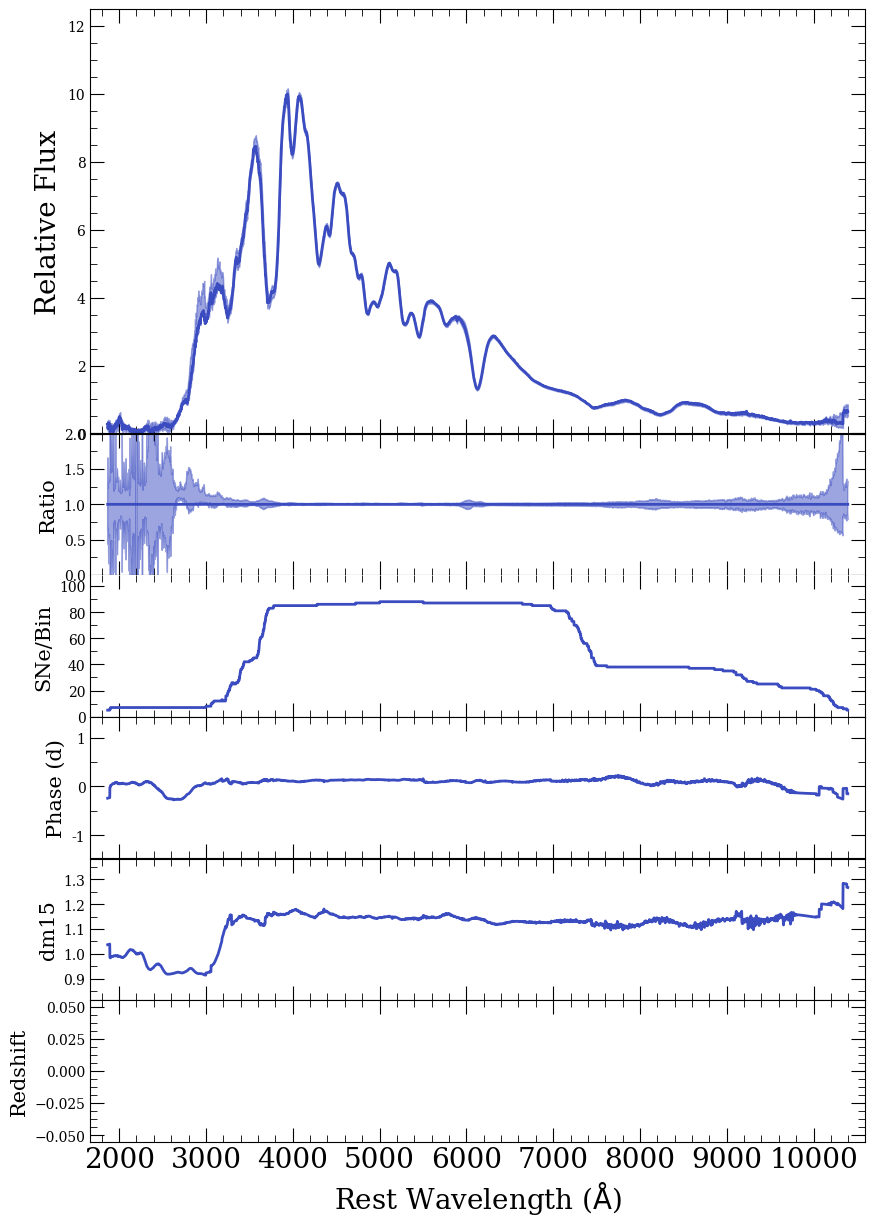

In [117]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

2011fe_combined


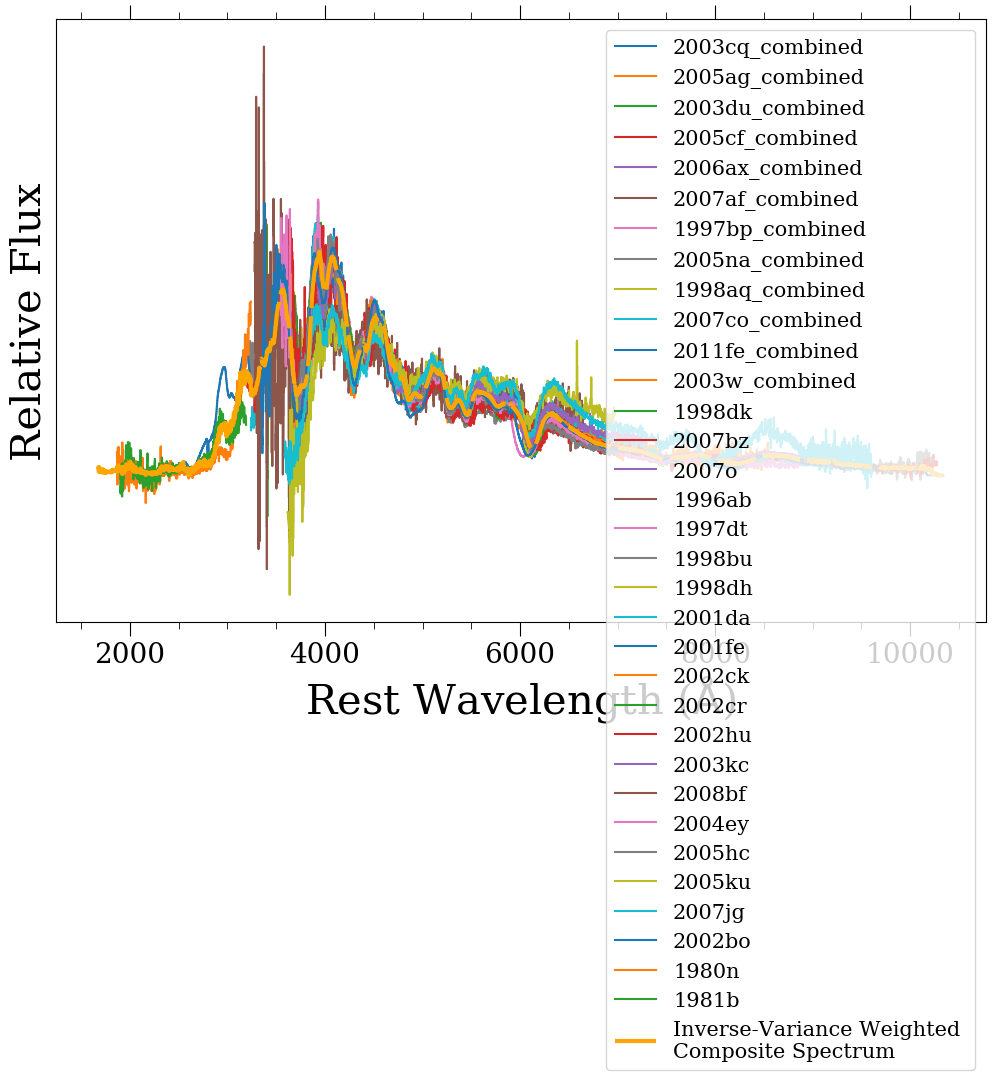

In [98]:
kplot.plot_comp_and_all_spectra(composites[0], sn_arrays[0],show_ivar=False, dm15=True)